---
### Digital Image Processing, Assignment 4
---
**Author:** Honi Selahaddin  
**Date:** 2022, June

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100

## [1] Morphological Operation

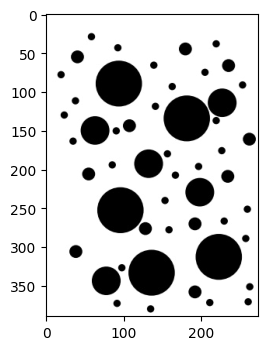

In [3]:
img = cv.imread('tseg1.jpg',0)
plt.imshow(img,cmap='gray')

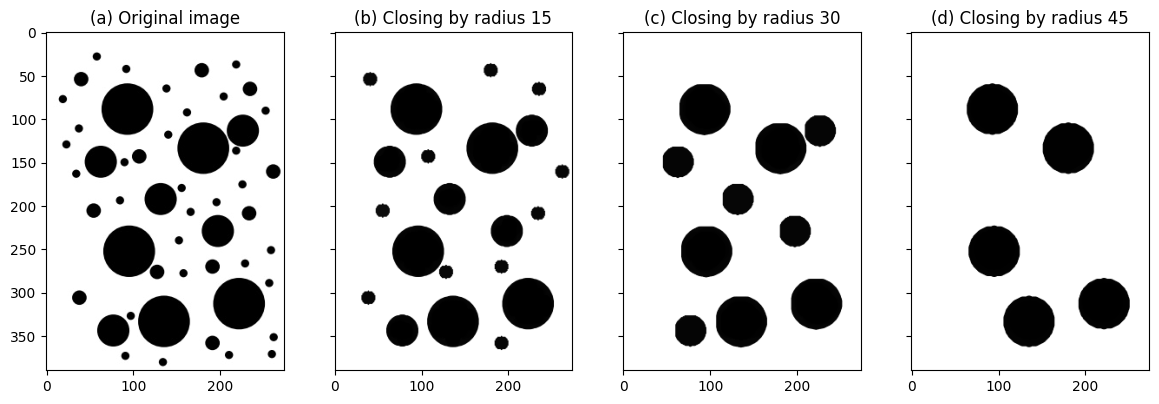

In [4]:
img_out = []

for radius in [15,30,45]: 
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(radius,radius))
    # dilate = cv.dilate(img.copy(),kernel)
    # erode = cv.erode(dilate,kernel)
    closing = cv.morphologyEx(img.copy(), cv.MORPH_CLOSE, kernel)   
    img_out.append(closing)   

# Plot 
fig, ax = plt.subplots(1,4,sharex=True,sharey=True,figsize=(12,4))

ax[0].set_title(f"(a) Original image", loc="center")
ax[0].imshow(img,cmap='gray')
ax[1].set_title(f"(b) Closing by radius 15", loc="center")
ax[1].imshow(img_out[0],cmap='gray')
ax[2].set_title(f"(c) Closing by radius 30", loc="center")
ax[2].imshow(img_out[1],cmap='gray')
ax[3].set_title(f"(d) Closing by radius 45", loc="center")
ax[3].imshow(img_out[2],cmap='gray')

fig.tight_layout()

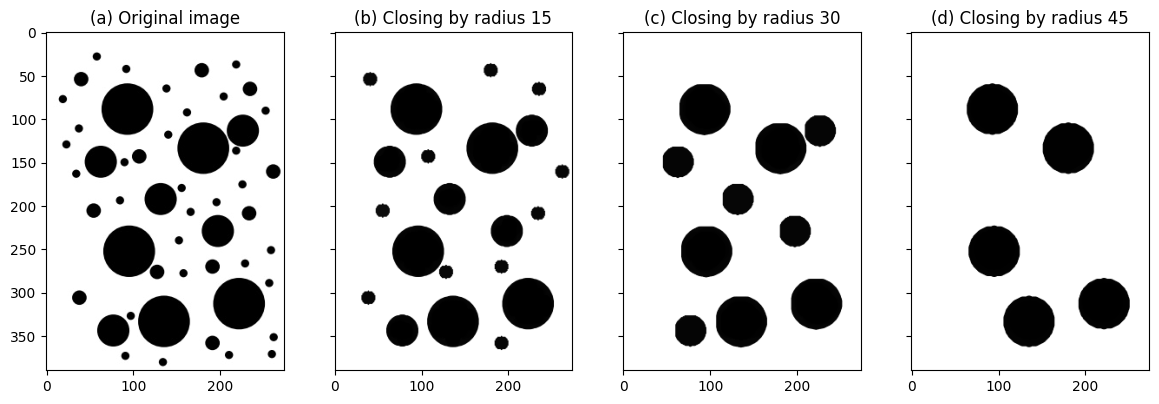

In [5]:
img_out = []

for radius in [15,30,45]: 
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(radius,radius))
    closing = cv.morphologyEx(img.copy(), cv.MORPH_CLOSE, kernel)   
    img_out.append(closing)   

# Plot 
fig, ax = plt.subplots(1,4,sharex=True,sharey=True,figsize=(12,4))

ax[0].set_title(f"(a) Original image", loc="center")
ax[0].imshow(img,cmap='gray')
ax[1].set_title(f"(b) Closing by radius 15", loc="center")
ax[1].imshow(img_out[0],cmap='gray')
ax[2].set_title(f"(c) Closing by radius 30", loc="center")
ax[2].imshow(img_out[1],cmap='gray')
ax[3].set_title(f"(d) Closing by radius 45", loc="center")
ax[3].imshow(img_out[2],cmap='gray')

fig.tight_layout()

In [6]:
cv.imwrite('1-a.jpg',img)
cv.imwrite('1-b.jpg',img_out[0])
cv.imwrite('1-c.jpg',img_out[1])
cv.imwrite('1-d.jpg',img_out[2])

True

## [2] Morphological Textural Segmentation 
### Additional Exercise from Textbook

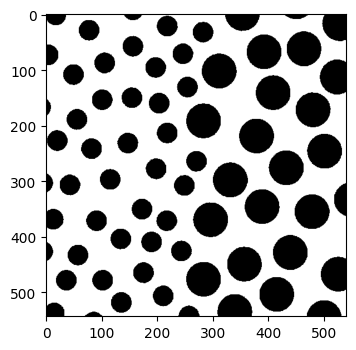

In [7]:
img = cv.imread('demo.png',0) # Read image as gray-scale
ret,img = cv.threshold(img,127,255,cv.THRESH_BINARY)
plt.imshow(img,cmap='gray')

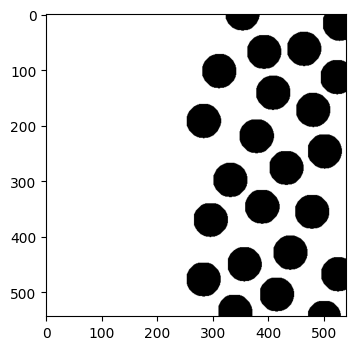

In [8]:
c = cv.morphologyEx(img.copy(), cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(50,50)))
plt.imshow(c,cmap='gray')

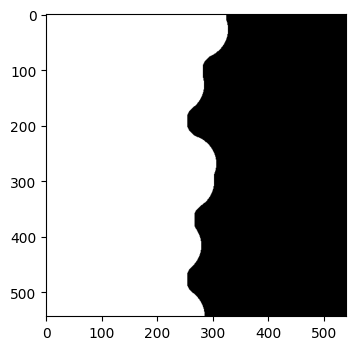

In [9]:
o = cv.morphologyEx(c.copy(), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(100,100)))
plt.imshow(o,cmap='gray')

In [10]:
cv.imwrite('demo.jpg',img)
cv.imwrite('demo-closing.jpg',c)
cv.imwrite('demo-opening.jpg',o)

True

### Problem 2

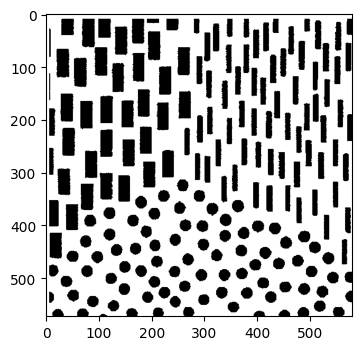

In [11]:
img = cv.imread('tseg2.jpg',0) # Read image as gray-scale
ret,img = cv.threshold(img,127,255,cv.THRESH_BINARY)
plt.imshow(img,cmap='gray')

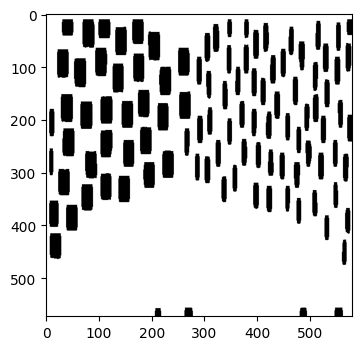

In [12]:
# Region 1 : Bold rectangle
# Region 2 : Thin rectangle
# Region 3 : Circle

# Closing for removing region 3 (circles)
c1 = cv.morphologyEx(img.copy(), cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,30)), iterations=1) # OK
plt.imshow(c1,cmap='gray')

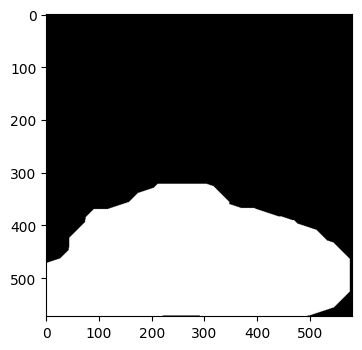

In [13]:
# Opening for darkening both textural regions 1 and 2
o1 = cv.morphologyEx(c1.copy(), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,10)), iterations=15) # OK
# this operation resulted in mask for segment 3
segment3 = o1.copy()
plt.imshow(segment3,cmap='gray')

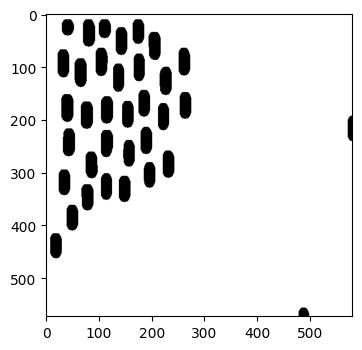

In [14]:
# Closing both regions II and III
c2 = cv.morphologyEx(img.copy(), cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,30)), iterations=1) # OK
plt.imshow(c2,cmap='gray')

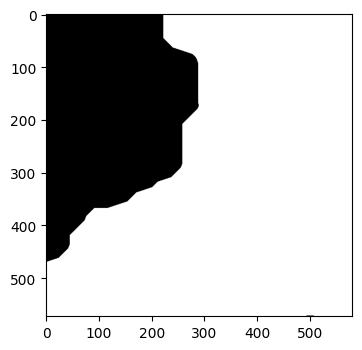

In [15]:
# Opening for darkening region I
o2 = cv.morphologyEx(c2.copy(), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,10)), iterations=15) # OK
# this operation resulted in mask for segment 2 + 3
segment23 = o2.copy()
plt.imshow(segment23,cmap='gray')

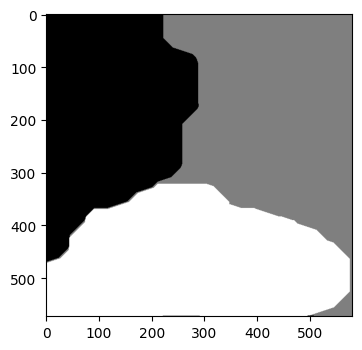

In [16]:
# `segment3` and `segment23` are computed by closing followed by openings
# `segment2` can be obtained by simple subtraction
segment2 = segment23 - segment3

# converting segment variables to mask
mask2 = np.where(segment2>0)
mask3 = np.where(segment3>0)

# initialize a dark image with same size
segmented = np.zeros_like(img)
segmented[mask2] = 127
segmented[mask3] = 255

plt.imshow(segmented, cmap='gray')

In [17]:
cv.imwrite('2-closing1.jpg',c1)
cv.imwrite('2-opening1.jpg',o1)
cv.imwrite('2-closing2.jpg',c2)
cv.imwrite('2-opening2.jpg',o2)
cv.imwrite('2-segmented.jpg',segmented)

True

## Problem 3

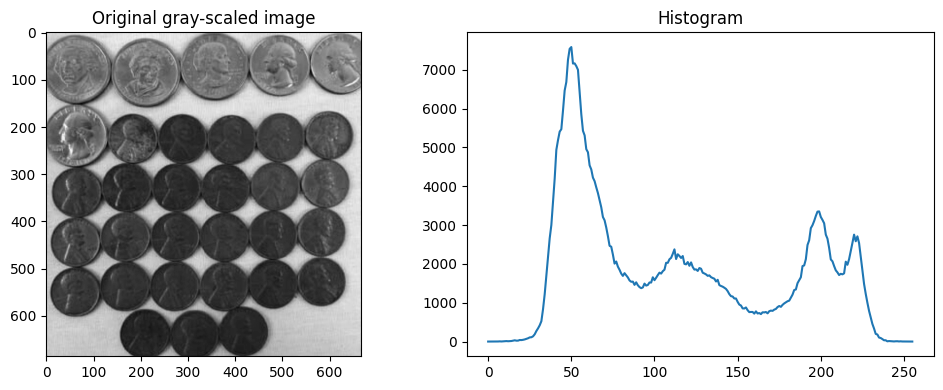

In [18]:
img = cv.imread('tseg3.jpg',0) # Read image as gray-scale

# Plot histogram for specifying binary threshold
hist,bin = np.histogram(img.ravel(),256,[0,255])

fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(10,4))

ax[0].set_title(f"Original gray-scaled image", loc="center")
ax[0].imshow(img,cmap='gray')
ax[1].set_title(f"Histogram", loc="center")
ax[1].plot(hist)

fig.tight_layout()
fig.savefig('3-hist.jpg')

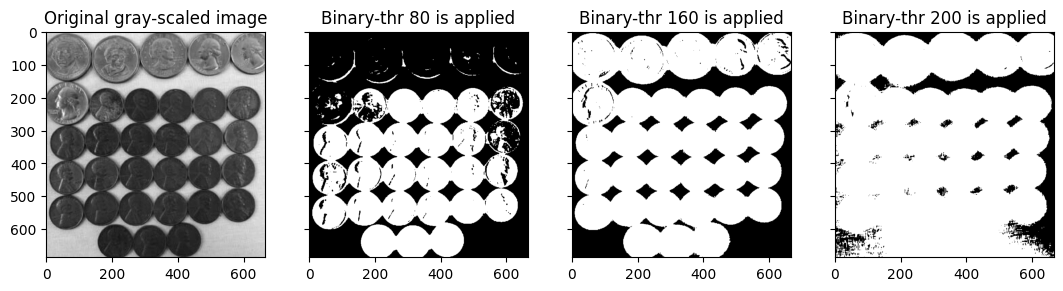

In [19]:
img_out = []

thresh_vals = [80,160,200]
for thresh in thresh_vals: 
    ret,img_thr = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
    img_out.append(img_thr)   

# Plot 
fig, ax = plt.subplots(1,4,sharex=True,sharey=True,figsize=(13,4))

ax[0].set_title(f"Original gray-scaled image", loc="center")
ax[0].imshow(img,cmap='gray')
ax[1].set_title(f"Binary-thr {thresh_vals[0]} is applied", loc="center")
ax[1].imshow(img_out[0],cmap='gray')
ax[2].set_title(f"Binary-thr {thresh_vals[1]} is applied", loc="center")
ax[2].imshow(img_out[1],cmap='gray')
ax[3].set_title(f"Binary-thr {thresh_vals[2]} is applied", loc="center")
ax[3].imshow(img_out[2],cmap='gray')

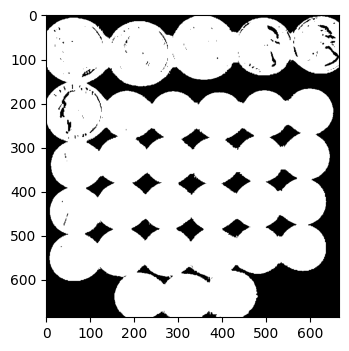

In [20]:
ret,mask = cv.threshold(img,160,255,cv.THRESH_BINARY_INV)
plt.imshow(mask,cmap='gray')

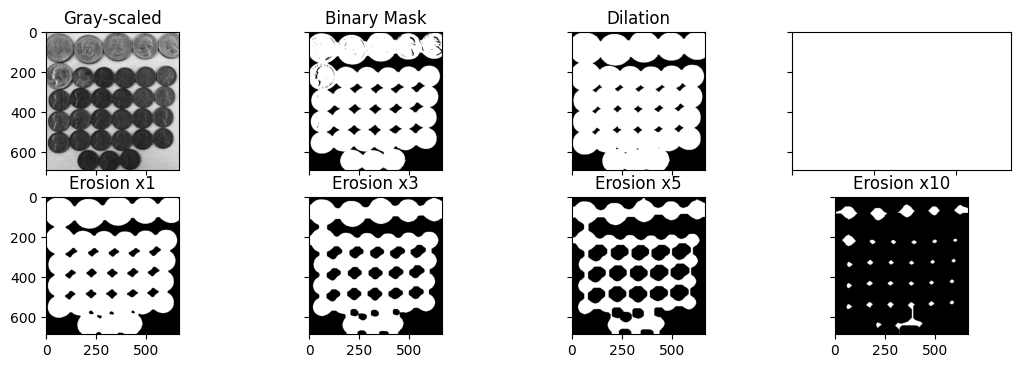

In [21]:
radius = 10
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(radius,radius))

d1 = cv.dilate(mask.copy(), kernel, iterations=1)

e1 = cv.erode(d1.copy(), kernel, iterations=1) 
e3 = cv.erode(d1.copy(), kernel, iterations=3) 
e5 = cv.erode(d1.copy(), kernel, iterations=5) 
e10 = cv.erode(d1.copy(), kernel, iterations=10) 
e11 = cv.erode(d1.copy(), kernel, iterations=11) 
    
# Plot 
fig, ax = plt.subplots(2,4,sharex=True,sharey=True,figsize=(13,4))

ax[0][0].set_title(f"Gray-scaled", loc="center")
ax[0][0].imshow(img,cmap='gray')
ax[0][1].set_title(f"Binary Mask", loc="center")
ax[0][1].imshow(mask,cmap='gray')
ax[0][2].set_title(f"Dilation", loc="center")
ax[0][2].imshow(d1,cmap='gray')
ax[1][0].set_title(f"Erosion x1", loc="center")
ax[1][0].imshow(e1,cmap='gray')
ax[1][1].set_title(f"Erosion x3", loc="center")
ax[1][1].imshow(e3,cmap='gray')
ax[1][2].set_title(f"Erosion x5", loc="center")
ax[1][2].imshow(e5,cmap='gray')
ax[1][3].set_title(f"Erosion x10", loc="center")
ax[1][3].imshow(e10,cmap='gray')


In [22]:
cv.imwrite('3-gray.jpg',img)
cv.imwrite('3-mask.jpg',mask)
cv.imwrite('3-dilate.jpg',d1)
cv.imwrite('3-erode1.jpg',e1)
cv.imwrite('3-erode3.jpg',e3)
cv.imwrite('3-erode5.jpg',e5)
cv.imwrite('3-erode10.jpg',e10)

True